In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
file_path = 'datasets/observed_rent_index_co.pkl' 
df = pd.read_pickle(file_path)

df

,RegionName,observed_rent_index
0,Denver,"[1304.498990459729, 1320.389460587924, 1336.25..."
1,Colorado Springs,"[1075.8859562843352, 1082.4341742227648, 1083...."
2,Fort Collins,"[1239.4681794663654, 1254.2975748039426, 1270...."
3,Boulder,"[1469.5117878857184, 1485.7845579329396, 1487...."
4,Greeley,"[889.9139579214843, 889.2279974686633, 1177.79..."
5,Pueblo,"[977.0537417739934, 979.2562129236093, 984.624..."
6,Grand Junction,"[860.0384172374817, 862.2214728789226, 860.792..."
7,Glenwood Springs,"[904.6120700617494, 913.6571255498984, 918.240..."
8,Edwards,"[788.9847388791753, 789.4476484470792, 786.649..."
9,Durango,"[787.5393972393931, 787.8950299832941, 785.004..."


C:\Users\rishe\AppData\Local\Temp\ipykernel_4128\3462790391.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start, freq=freq, periods=periods)
12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


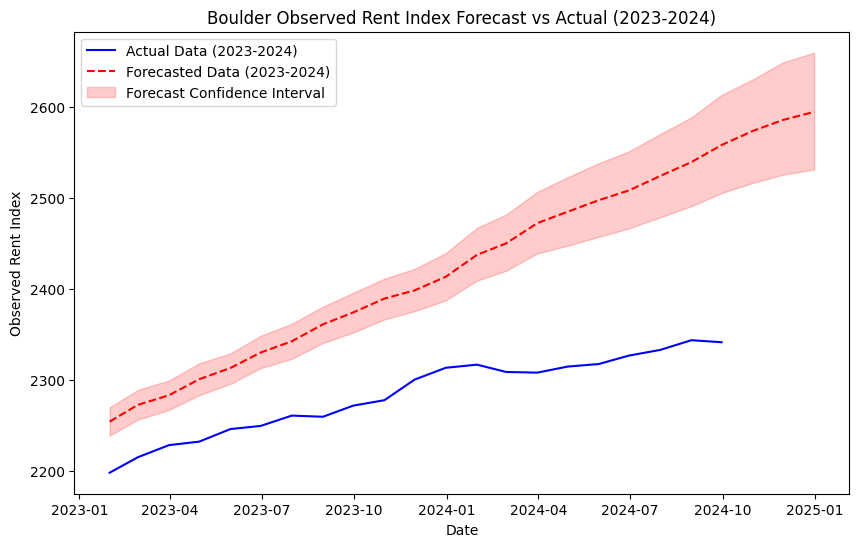

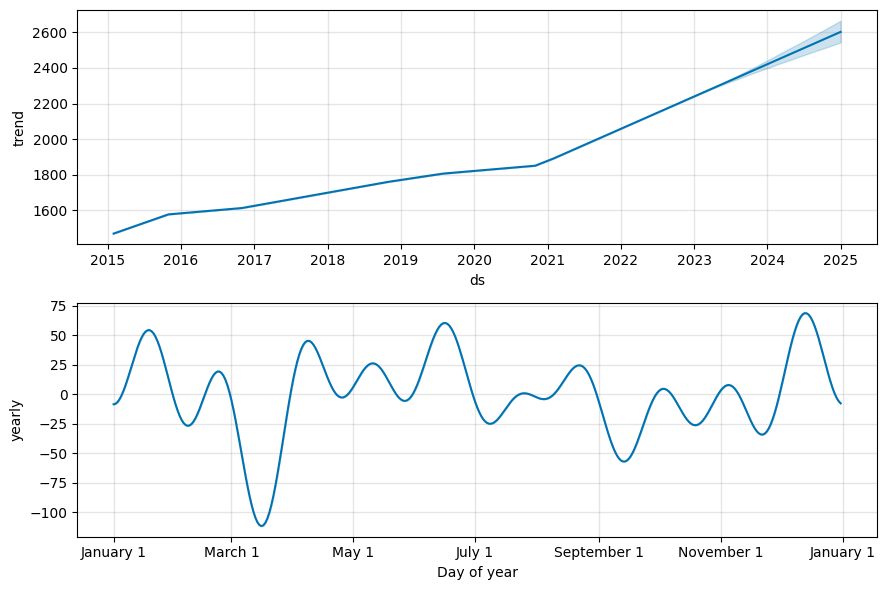

Forecast data (2023-2024):
            ds         yhat   yhat_lower   yhat_upper
96  2023-01-31  2254.540805  2239.193379  2270.084878
97  2023-02-28  2272.905624  2256.770937  2289.289250
98  2023-03-31  2283.502236  2267.347103  2299.665191
99  2023-04-30  2301.049540  2283.637047  2318.450943
100 2023-05-31  2313.357894  2295.962412  2329.379532
101 2023-06-30  2330.273092  2313.225430  2348.604644
102 2023-07-31  2342.676878  2323.468766  2361.847485
103 2023-08-31  2361.266049  2340.831540  2380.724883
104 2023-09-30  2374.279064  2352.289779  2395.826855
105 2023-10-31  2389.489598  2366.661996  2411.329872
106 2023-11-30  2398.465771  2375.664611  2422.008882
107 2023-12-31  2413.448680  2387.634043  2439.407669
108 2024-01-31  2437.422918  2409.178871  2467.080819
109 2024-02-29  2450.061795  2420.012536  2481.755543
110 2024-03-31  2472.315352  2439.141267  2506.497192
111 2024-04-30  2484.696810  2447.403704  2522.468097
112 2024-05-31  2497.360559  2457.179665  2537.986884
1

In [3]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

def create_date_range(start='2015-01-31', end='2024-09-30', freq='M', periods=None):
    """ 
    Create a DatetimeIndex with enhanced flexibility.
    """
    try:
        if periods:
            # Use periods and start, don't specify end
            date_range = pd.date_range(start=start, freq=freq, periods=periods)
        else:
            # Use start and end, don't specify periods
            date_range = pd.date_range(start=start, end=end, freq=freq)
        return date_range
    except Exception as e:
        print(f"Error creating date range: {e}")
        return None

def forecast_rent_values(file_path='datasets/observed_rent_index_co.pkl', region='Boulder'):
    # Read the pickle file
    df = pd.read_pickle(file_path)
    
    # Filter data for the specific region (e.g., Boulder)
    region_data = df[df['RegionName'] == region]['observed_rent_index'].values[0]
    
    # Create date range for historical data (from 2015-01-31 to 2024-09-30)
    date_range = create_date_range(start='2015-01-31', end='2024-09-30', freq='M', periods=len(region_data))
    
    # Convert rent data into a pandas DataFrame for Prophet
    df_region = pd.DataFrame({
        'ds': date_range,  # Generated date range
        'y': region_data 
    })
    
    # Split data for training (up to 2022) and testing (2023-2024)
    train_data = df_region[df_region['ds'] < '2023-01-01']
    test_data = df_region[df_region['ds'] >= '2023-01-01']
    
    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(train_data)
    
    # Create a dataframe for future dates (up to the end of 2024)
    future = model.make_future_dataframe(periods=24, freq='M')  # Forecast for 24 months (2023-2024)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Filter the forecast data to show only the 2023-2024 period
    forecast_2023_2024 = forecast[forecast['ds'] >= '2023-01-01']
    
    # Plot forecast vs actual test data for 2023-2024
    plt.figure(figsize=(10, 6))
    
    # Actual data from test period (2023-2024)
    plt.plot(test_data['ds'], test_data['y'], label='Actual Data (2023-2024)', color='blue')  # Actual data
    
    # Forecasted data (2023-2024)
    plt.plot(forecast_2023_2024['ds'], forecast_2023_2024['yhat'], label='Forecasted Data (2023-2024)', color='red', linestyle='dashed')  # Forecasted data
    
    # Confidence Interval
    plt.fill_between(forecast_2023_2024['ds'], forecast_2023_2024['yhat_lower'], forecast_2023_2024['yhat_upper'], color='red', alpha=0.2, label='Forecast Confidence Interval')  # Confidence interval
    
    # Titles and labels
    plt.title(f'{region} Observed Rent Index Forecast vs Actual (2023-2024)')
    plt.xlabel('Date')
    plt.ylabel('Observed Rent Index')
    
    # Add legend
    plt.legend()  # Show legend to differentiate actual and forecasted data
    plt.show()
    
    # Plot model components (seasonality, trend, etc.)
    fig_components = model.plot_components(forecast)
    plt.show()
    
    # Print the forecasted data for 2023-2024
    print("Forecast data (2023-2024):")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24))
    
    # Calculate accuracy metrics for 2023-2024
    def calculate_accuracy(original, forecast):
        # Align forecast with test data (2023-2024)
        test_forecast = forecast[forecast['ds'] >= '2023-01-01']
        
        # Mean Absolute Percentage Error (MAPE)
        mape = abs((original - test_forecast['yhat']) / original).mean() * 100
        
        # Mean Absolute Error (MAE)
        mae = abs(original - test_forecast['yhat']).mean()
        
        # Root Mean Squared Error (RMSE)
        rmse = ((original - test_forecast['yhat'])**2).mean()**0.5
        
        return {
            'MAPE': mape,
            'MAE': mae,
            'RMSE': rmse
        }
    
    # Use 2023-2024 data for testing accuracy
    accuracy_metrics = calculate_accuracy(test_data['y'], forecast)
    
    print("\nAccuracy Metrics:")
    for metric, value in accuracy_metrics.items():
        print(f"{metric}: {value}")
    
    return model, forecast, accuracy_metrics

# Example usage
model, forecast, accuracy = forecast_rent_values()
